## <center><font color='red'>**PUBG Game Prediction**</font></center>

<center><img src= "https://media3.giphy.com/media/VwGyNp25HzBgFFmviV/giphy.gif?cid=ecf05e47l0la93pef5fanxl7ql81r573ib27jhzarh2vva1g&ep=v1_gifs_search&rid=giphy.gif&ct=g"></center>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pubg-games-dataset/PUBG_Game_Prediction_data.csv


## Table Content
1. [Importing Libraries](#import)
2. [Loading Data](#load)
3. [Data Wrangling](#wrangle)
4. [Feature Engineering](#feature)
5. [ML - Catboost Model](#catboost)

### Importing Libraries<a class='anchor' id ='import'>

In [2]:
# Standard Libraries
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
# rc: predefined Parameters 
plt.rcParams["figure.figsize"] = [16,6]

import seaborn as sns

# Handling warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Loading Data<a class='anchor' id ='load'>

In [3]:
df = pd.read_csv("/kaggle/input/pubg-games-dataset/PUBG_Game_Prediction_data.csv")
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
df.shape

(4446966, 29)

In [5]:
# Information about datatype of all parameters
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

### Data Descritption

- <b>DBNOs -</b> Number of enemy players knocked.
- **assists -** Number of enemy players this player damaged that were killed by teammates.
- **boosts -** Number of boost items used.
- **damageDealt -** Total damage dealt. Note: Self inflicted damage is subtracted.
- **headshotKills -** Number of enemy players killed with headshots.
- **heals -** Number of healing items used.
- **Id -** Player’s Id
- **killPlace -** Ranking in match of number of enemy players killed.
- **killPoints -** Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- **killStreaks -** Max number of enemy players killed in a short amount of time.
- **kills -** Number of enemy players killed.
- **longestKill -** Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- **matchDuration -** Duration of match in seconds.
- **matchId -** ID to identify match. There are no matches that are in both the training and testing set.
- **matchType -** String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- **rankPoints -** Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- **revives -** Number of times this player revived teammates.
- **rideDistance -** Total distance traveled in vehicles measured in meters.
- **roadKills -** Number of kills while in a vehicle.
- **swimDistance -** Total distance traveled by swimming measured in meters.
- **teamKills -** Number of times this player killed a teammate.
- **vehicleDestroys -** Number of vehicles destroyed.
- **walkDistance -** Total distance traveled on foot measured in meters.- 
- **weaponsAcquired -** Number of weapons picked up.
- **winPoints -** Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- **groupId -** ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- **numGroups -** Number of groups we have data for in the match.
- **maxPlace -** Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- **winPlacePerc -** The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

## Data Wrangling<a class='anchor' id ='wrangle'>

#### Check for the rows with missing win prediction value

In [6]:
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [7]:
# Drop the row with index '2744604'
df.drop(2744604,inplace=True)

#### Understanding Players distribution in a game

In [8]:
# Prepare new parameter to know how many players are in a game
df['playersJoined'] = df.groupby('matchId')['matchId'].transform('count')

In [9]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


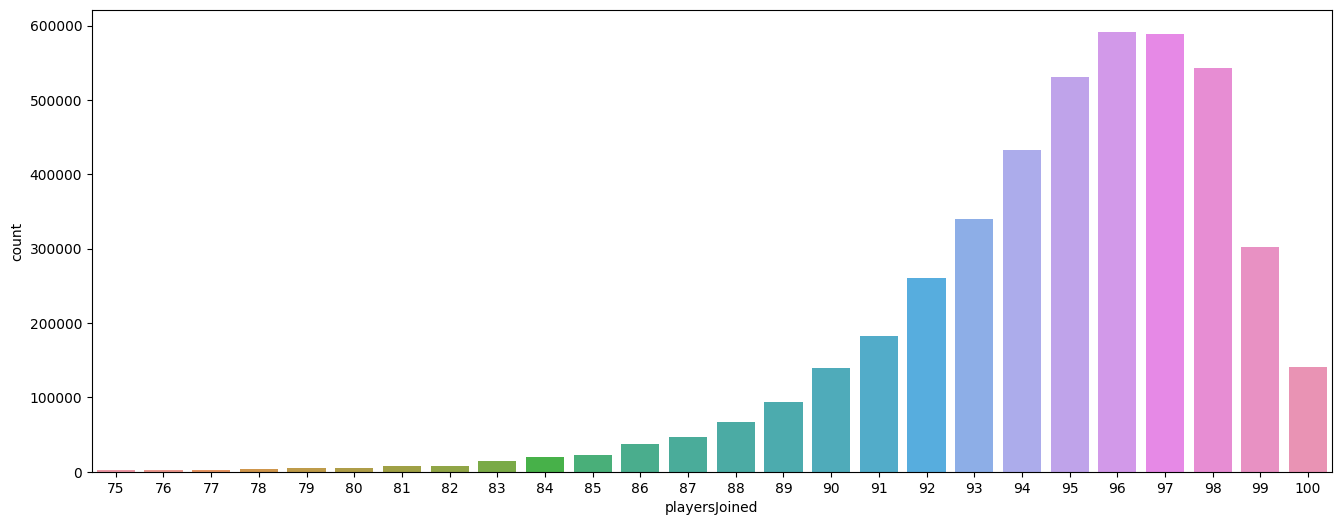

In [10]:
# Returns the dataframe where playersJoined>=75
filtered_df = df[df['playersJoined'] >= 75]
# Displays the count of playersJoined from the filtered_df
sns.countplot(x='playersJoined', data=filtered_df)
plt.show()

* The data should be normalised based on how many players are there in the game.
* Since, in a match where there are 100 player, making 20 kills is easier compared to a match where there are only 50 players.

### Analysing the Data

**Kills without moving?**

<center><img src = "https://media.giphy.com/media/OPRbXcsGctvZC/giphy.gif"></center>

* If a player has many kills without moving, it implies player is cheating.

In [11]:
# Prepare the data parameter to gather the information of the total distance travelled
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']

# Prepare a data parameter to check for anamoly detection 
# That the person has not moved but still managed to do the kills

df['killWithoutMoving'] = ((df['kills']>0) & (df['totalDistance']==0))

In [12]:
df[df['killWithoutMoving']==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killWithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [13]:
df[df['killWithoutMoving']==True].shape

(1535, 32)

In [14]:
# Dropping all such rows from the dataset to keep the dataset general
# Passing the list of all such indexes
df.drop(df[df['killWithoutMoving']==True].index,inplace=True)

**Extra Ordinary Road Kills**

In PUBG, "roadkill" refers to the act of causing the death of an opponent by hitting them with a vehicle. 

<center><img src = "https://media.giphy.com/media/3o7aD85usFbbbrCR3i/giphy.gif"></center>

In [15]:
df[df['roadKills']>5].shape

(46, 32)

It is not easy to make such roadKills, so we will be dropping these data instances

In [16]:
df.drop(df[df['roadKills']>5].index,inplace=True)

**So many kills - How??**

<center><img src = "https://media.giphy.com/media/3oxHQfzBhpKtgdDWtW/giphy.gif"></center>

A person having more than 20 kills will either be a pro-player or is cheating both are not general scenarios so we will be dropping such rows.

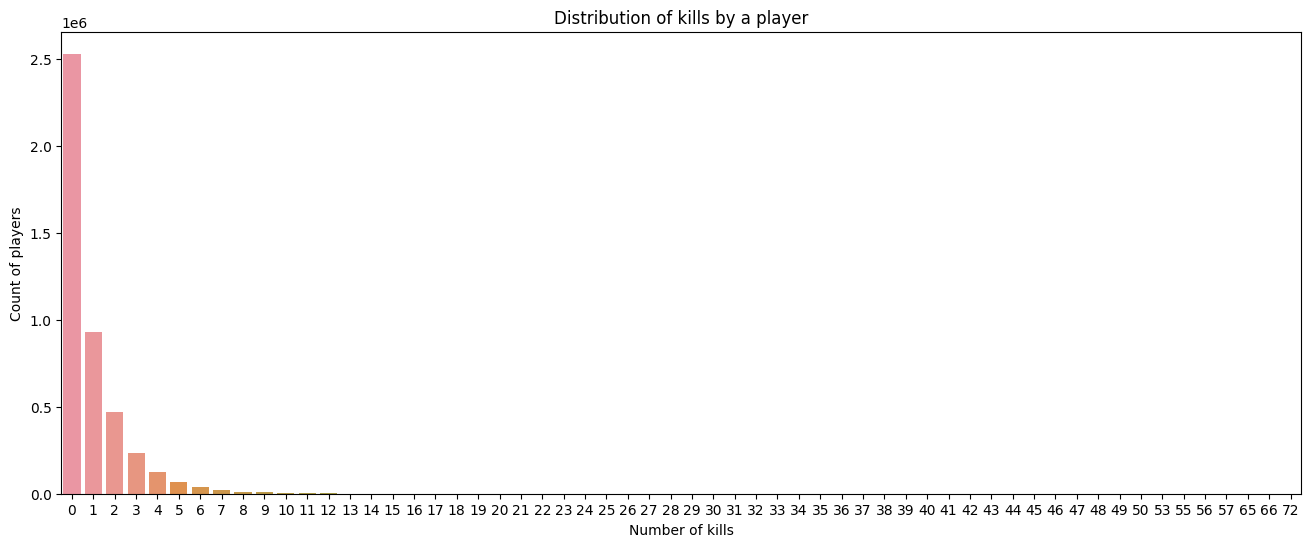

In [17]:
sns.countplot(data=df,x=df['kills']).set_title("Distribution of kills by a player")
plt.ylabel('Count of players')
plt.xlabel('Number of kills')
plt.show()

We can observe that 2.5 * 10^6 players have 0 kills and most other players have 1 to 5 kills

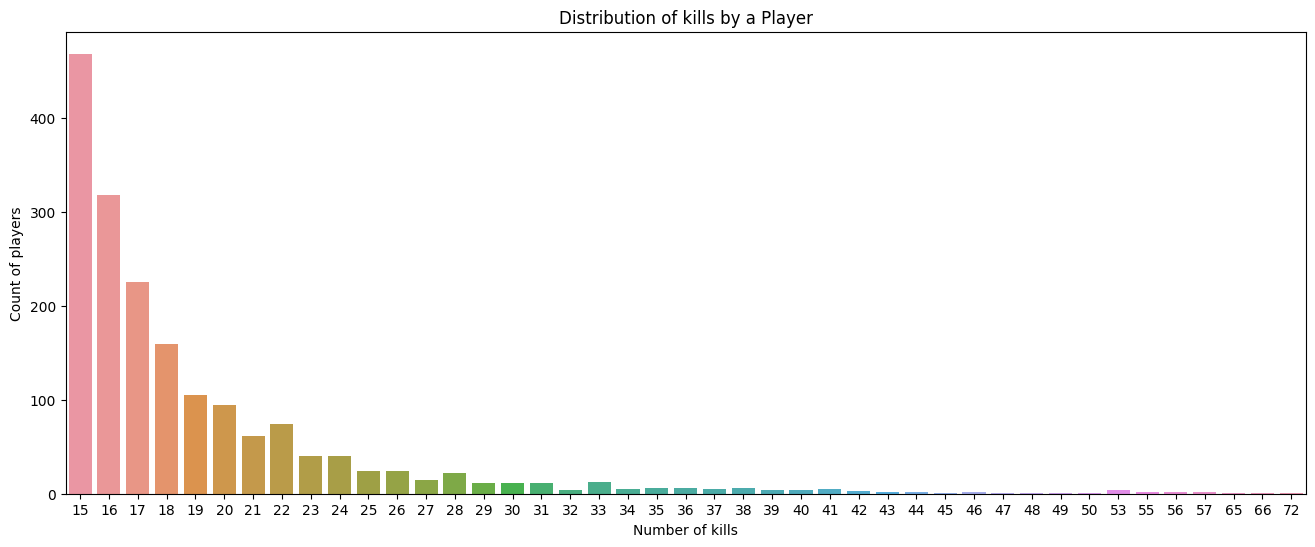

In [18]:
sns.countplot(data = df[df['kills']>=15],x='kills').set_title("Distribution of kills by a Player")
plt.ylabel('Count of players')
plt.xlabel('Number of kills')
plt.show()

We observe that very few players were able to make more than 20 kills.

In [19]:
# Data Dimension
df[df['kills']>20].shape

(417, 32)

In [20]:
df.drop(df[df['kills']>20].index,inplace=True)

#### Head Shot

<center><img src = "https://media.giphy.com/media/l3mZrOajz5VCZf7Hy/giphy.gif"></center>

We will prepare a new parameter call 'headshot_rate'. Which will give out of no. of kills made by a player how many were headshots.

In [21]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

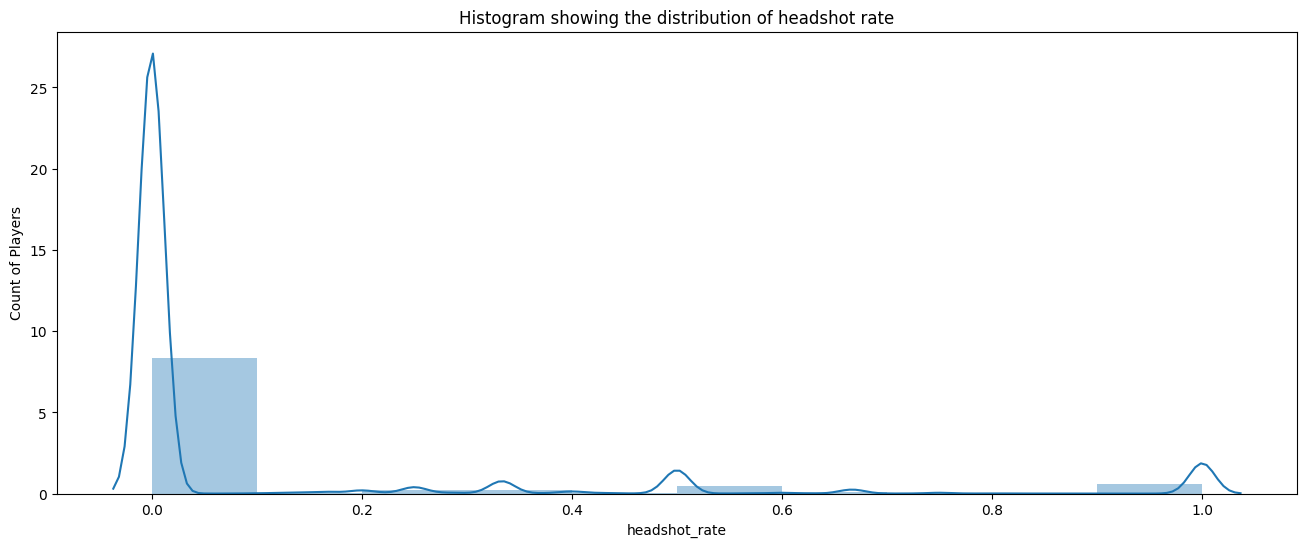

In [22]:
# Plot the headshot rate distribution
sns.distplot(df['headshot_rate'],bins=10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of Players")
plt.show()

If the "no_of_kills = no_of_headshots" then headshot_rate = 1

In [23]:
# Case when player have done more then 5 kills and all were headshots
df[(df['headshot_rate']==1) & (df['kills']>5)].shape

(187, 33)

In [24]:
df.drop(df[(df['headshot_rate']==1) & (df['kills']>5)].index,inplace=True)

### Longest Shot
How far you can kill a person

<center><img src = "https://media.giphy.com/media/3ohs7YomxqOz4GRHcQ/giphy.gif"></center>

A player needs a sniper to kill for long distances. The distance of more than 1Km is not feasable.

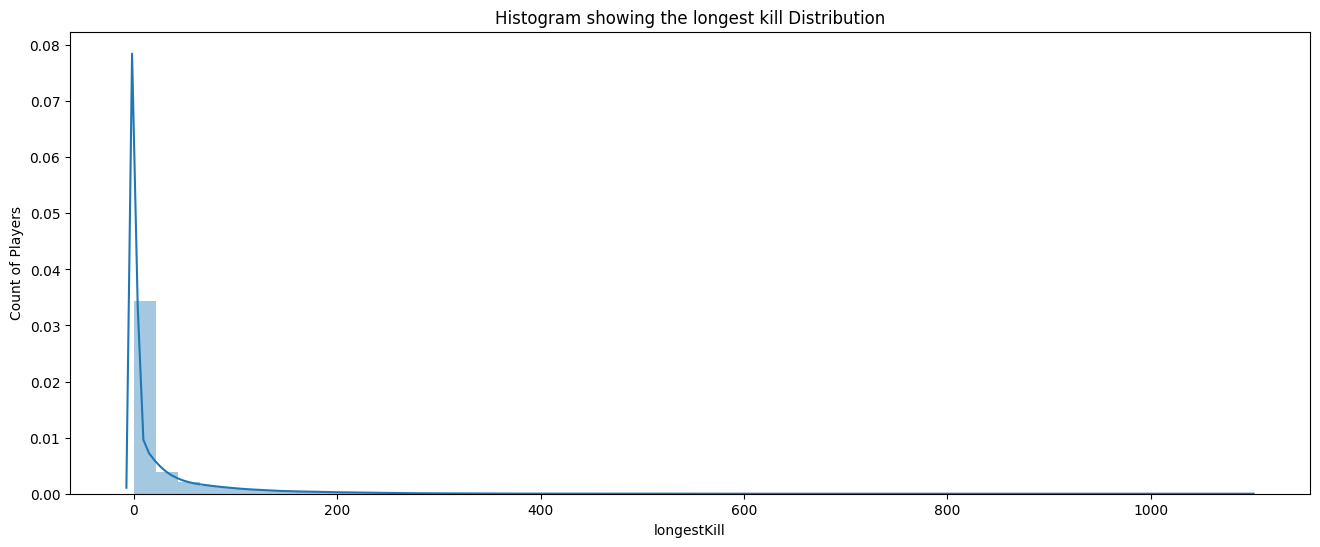

In [25]:
sns.distplot(df['longestKill'],bins=50).set_title("Histogram showing the longest kill Distribution")
plt.ylabel("Count of Players")
plt.show()

We can observe that most longestKill are within 200 m

We will be dropping data instances where longestKill is more than 500m

In [26]:
df[df['longestKill']>=500].shape

(1738, 33)

In [27]:
df.drop(df[df['longestKill']>=500].index,inplace=True)

### WeaponChange 
How many times you are changing the weapon?

<center><img src = "https://j.gifs.com/3loOmn.gif"></center>

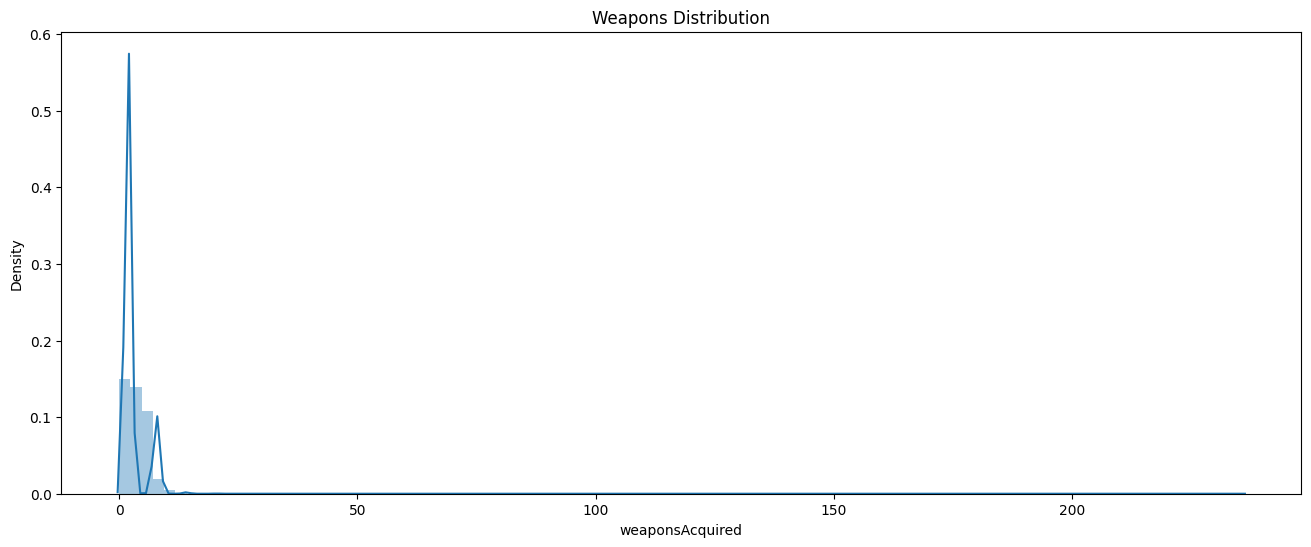

In [28]:
sns.distplot(df['weaponsAcquired'],bins=100).set_title("Weapons Distribution")
plt.show()

In [29]:
df[df["weaponsAcquired"]>=15].shape

(6809, 33)

We will be removing the rows where a player has changed their weapon more than 15 times.

In [30]:
df.drop(df[df["weaponsAcquired"]>=15].index,inplace=True)

### EDA 

In [31]:
df.shape

(4436233, 33)

In [32]:
# There are no null values in our data
df.isnull().sum()

Id                   0
groupId              0
matchId              0
assists              0
boosts               0
damageDealt          0
DBNOs                0
headshotKills        0
heals                0
killPlace            0
killPoints           0
kills                0
killStreaks          0
longestKill          0
matchDuration        0
matchType            0
maxPlace             0
numGroups            0
rankPoints           0
revives              0
rideDistance         0
roadKills            0
swimDistance         0
teamKills            0
vehicleDestroys      0
walkDistance         0
weaponsAcquired      0
winPoints            0
winPlacePerc         0
playersJoined        0
totalDistance        0
killWithoutMoving    0
headshot_rate        0
dtype: int64

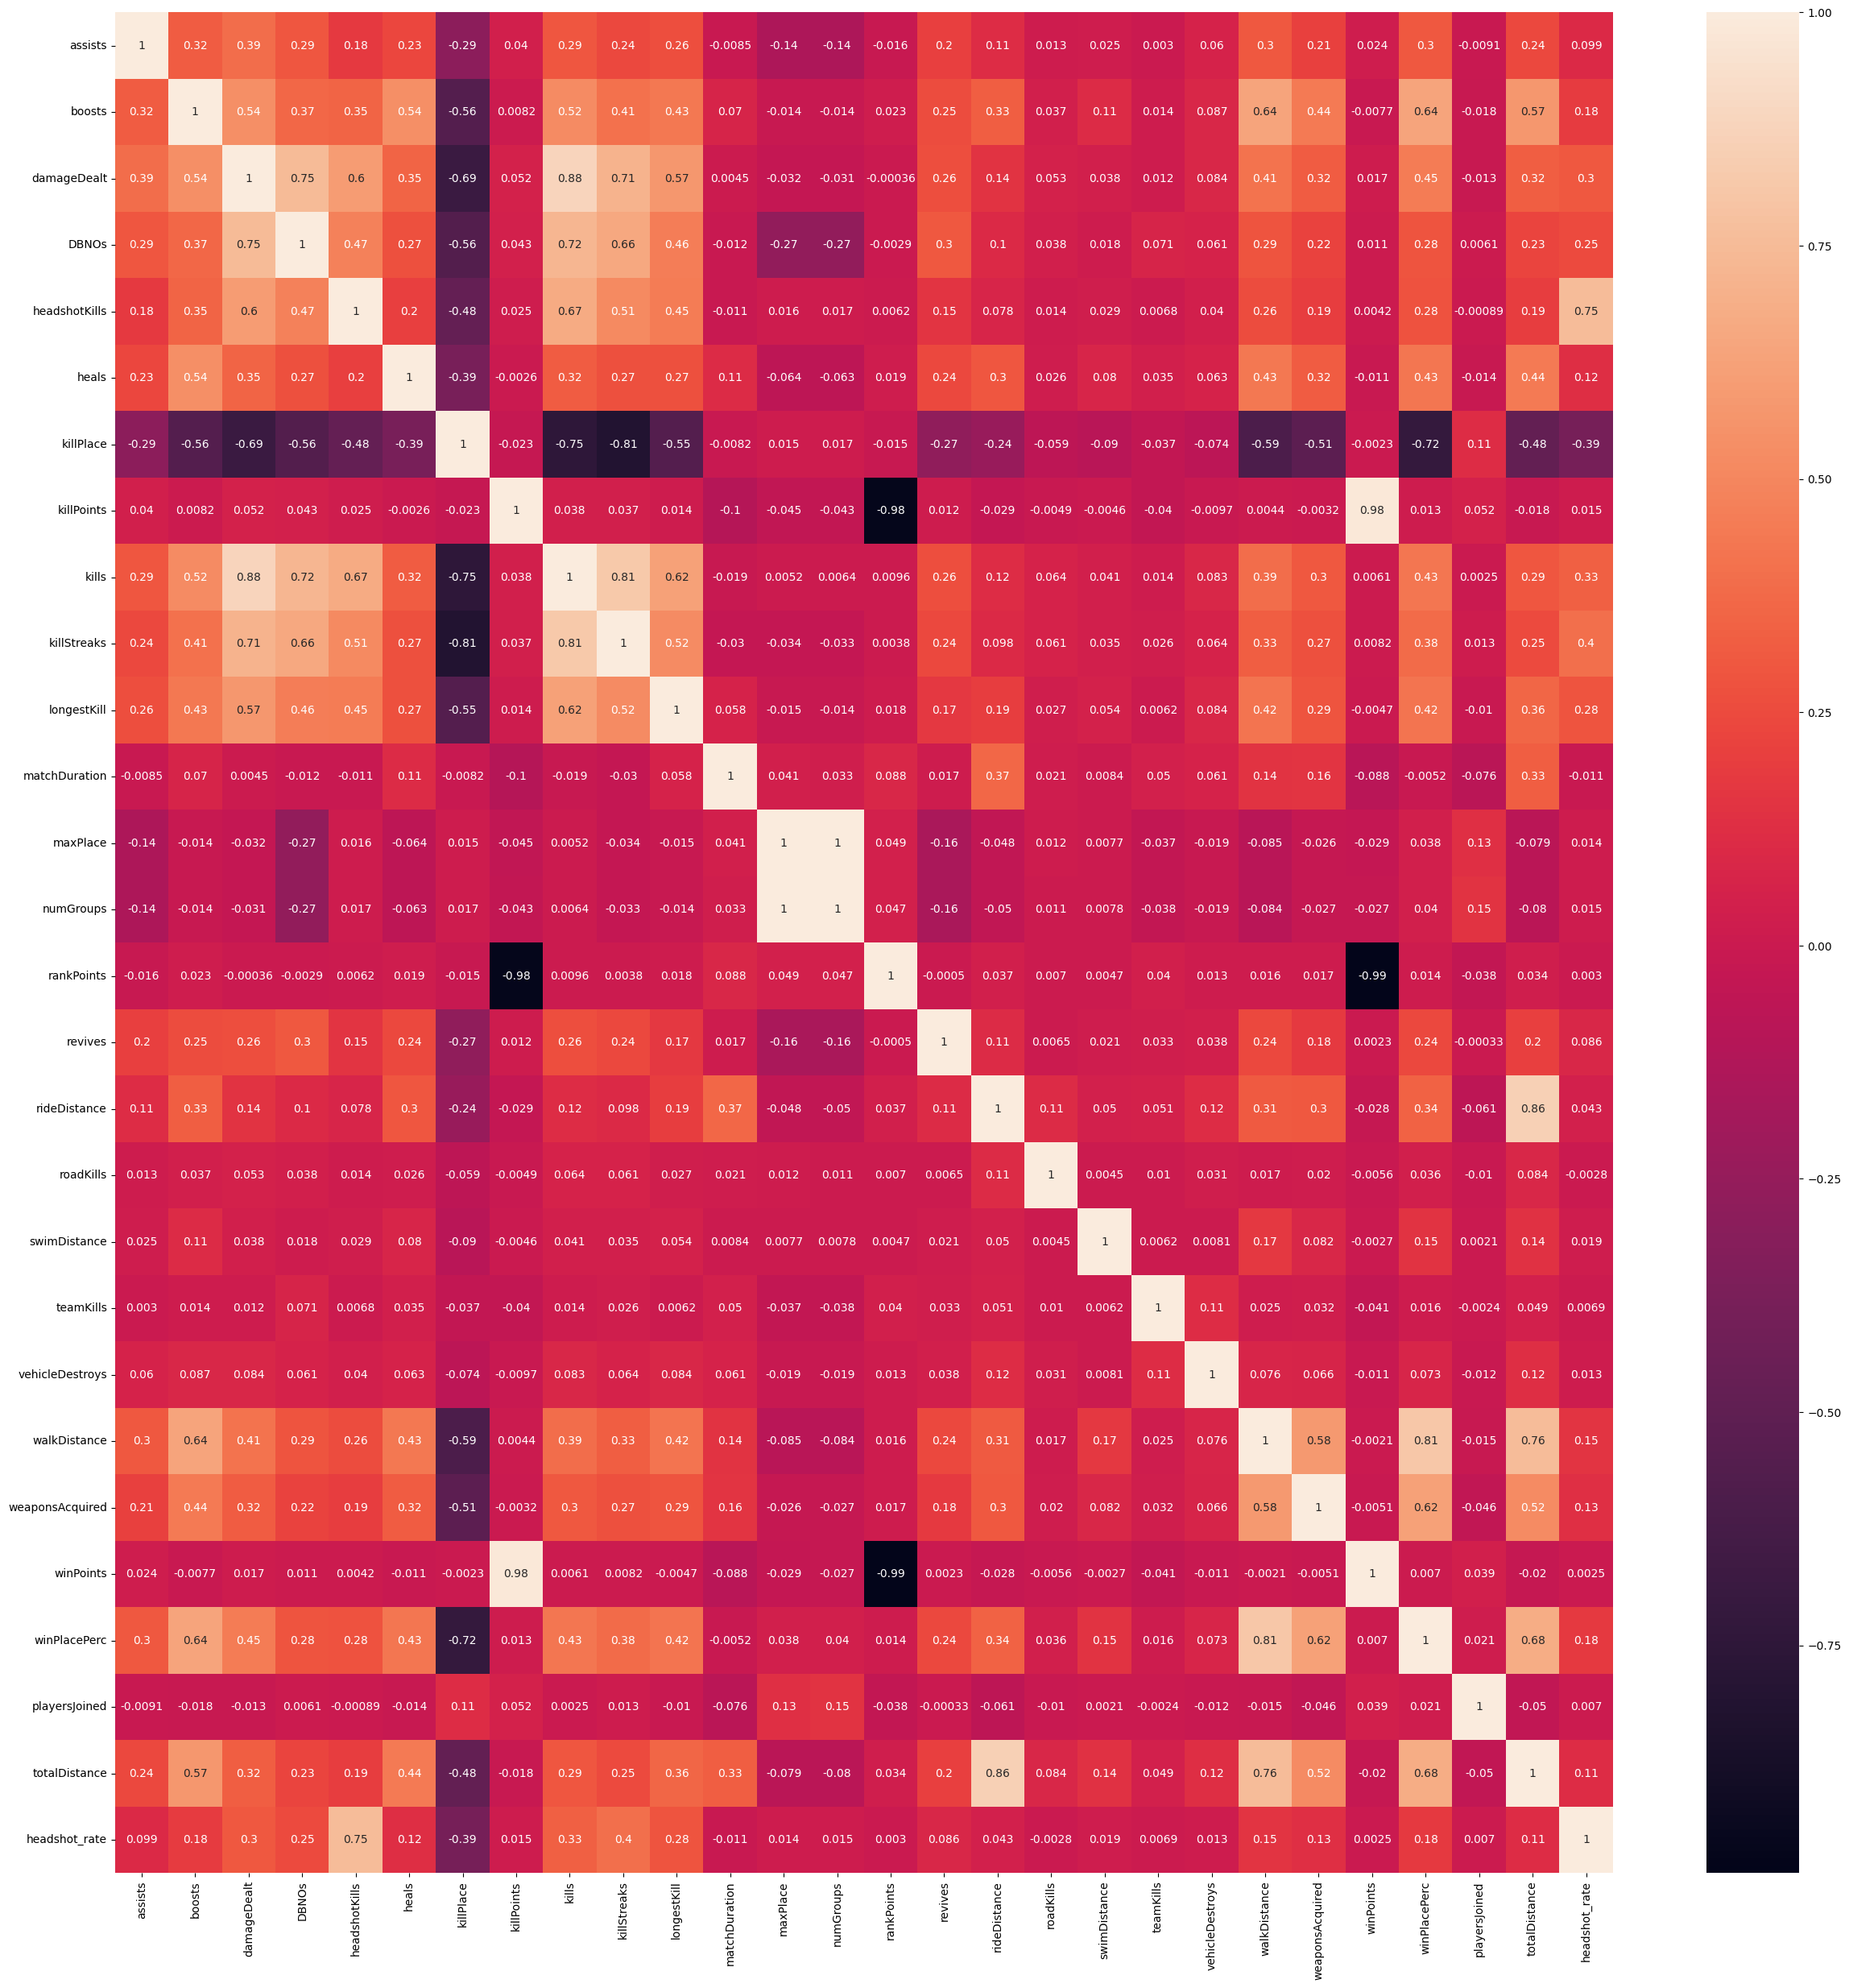

In [33]:
# correlation of parameter with Win Prediction
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_df = df[numeric_columns]

plt.figure(figsize=(30,30))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

## Feature Engineering<a class='anchor' id ='feature'>

In [34]:
# We will be giving more importnace to a game where no. of players are less
# than a game where no. of players are more.
normalizing_factor       = ((100 - df['playersJoined'])/100)+1
df['killsNorm']          = df['kills'] + normalizing_factor
df['damageDealtNorm']    = df['damageDealt'] + normalizing_factor
df['maxPlaceNorm']       = df['maxPlace'] + normalizing_factor
df['matchDuractionNorm'] = df['matchDuration'] + normalizing_factor

df['travelDistance']     = df['walkDistance'] + df['swimDistance'] + df['rideDistance']

df['healsnboosts']       = df['heals'] + df['boosts']
df['assist']             = df['assists'] + df['revives']

In [35]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'totalDistance', 'killWithoutMoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDuractionNorm',
       'travelDistance', 'healsnboosts', 'assist'],
      dtype='object')

After preparing the new columns we will be dropping the previous columns.

In [36]:
data = df.drop(columns = ['Id','groupId','matchId','assists','boosts','walkDistance','swimDistance','rideDistance',
                  'heals','revives','kills','damageDealt','maxPlace','matchDuration'])

In [37]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killWithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDuractionNorm,travelDistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,1.04,1.04,29.04,1307.04,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,1.09,92.56,27.09,1778.09,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,1.02,69.02,51.02,1319.02,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,1.09,33.99,32.09,1437.09,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,2.03,101.03,98.03,1425.03,49.7500,0,0


## ML-Catboost Model <a class='anchor' id ='catboost'>

### Handling categorical data

In [38]:
x = data.drop(['winPlacePerc'],axis=1)
y = data['winPlacePerc']

In [39]:
features = x.columns

In [40]:
features

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'playersJoined', 'totalDistance', 'killWithoutMoving', 'headshot_rate',
       'killsNorm', 'damageDealtNorm', 'maxPlaceNorm', 'matchDuractionNorm',
       'travelDistance', 'healsnboosts', 'assist'],
      dtype='object')

In [41]:
# One Hot Encoding
x = pd.get_dummies(x,columns =['matchType','killWithoutMoving'])

In [42]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killWithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,False,False,False,False,False,False,False,False,True,True
1,0,0,57,0,0,0.00,25,1484,0,0,...,False,False,False,False,False,False,False,False,True,True
2,0,0,47,0,0,0.00,47,1491,0,0,...,False,False,False,False,False,False,False,False,False,True
3,0,0,75,0,0,0.00,30,1408,0,0,...,False,False,False,False,False,False,False,False,True,True
4,0,0,45,0,1,58.53,95,1560,0,0,...,False,False,False,False,False,False,True,False,False,True


In [43]:
x.shape

(4436233, 40)

In [44]:
features = x.columns

### Scaling the Data

In [45]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [46]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.582948,-0.384165,0.449324,1.172491,-0.765121,-0.459623,-0.732885,-1.212390,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405066,1.236181,0.0
1,-0.582948,-0.384165,0.340033,-0.804728,-0.765121,-0.459623,-0.775859,0.803565,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405066,1.236181,0.0
2,-0.582948,-0.384165,-0.024272,-0.804728,-0.765121,-0.459623,0.169559,0.813067,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405066,-0.808943,0.0
3,-0.582948,-0.384165,0.995782,-0.804728,-0.765121,-0.459623,-0.560991,0.700391,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405066,1.236181,0.0
4,-0.582948,-0.384165,-0.097133,-0.804728,0.647737,0.727503,2.232287,0.906738,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,2.696902,-0.405066,-0.808943,0.0


### Splitting the Data

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [48]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(3105363, 40) (3105363,)
(1330870, 40) (1330870,)


### Catboost Model
Gradient Boosting technique on decision tree.

In [49]:
import catboost as cb

In [50]:
train_dataset = cb.Pool(x_train,y_train)
test_dataset  = cb.Pool(x_test,y_test)

In [51]:
model = cb.CatBoostRegressor(loss_function='RMSE')

### Grid Search

In [52]:
# Dictionary having key:value pairs
# Run your model one by one on all these combinations
# Passes the combination that is best for model performance
grid = {'iterations': [100],
        'learning_rate': [0.03],
        'depth': [2, 4]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5480985	test: 0.5486727	best: 0.5486727 (0)	total: 298ms	remaining: 29.5s
1:	learn: 0.5332354	test: 0.5337938	best: 0.5337938 (1)	total: 480ms	remaining: 23.5s
2:	learn: 0.5188656	test: 0.5194102	best: 0.5194102 (2)	total: 655ms	remaining: 21.2s
3:	learn: 0.5049623	test: 0.5054874	best: 0.5054874 (3)	total: 831ms	remaining: 19.9s
4:	learn: 0.4915250	test: 0.4920378	best: 0.4920378 (4)	total: 1.01s	remaining: 19.2s
5:	learn: 0.4785252	test: 0.4790259	best: 0.4790259 (5)	total: 1.18s	remaining: 18.5s
6:	learn: 0.4659407	test: 0.4664248	best: 0.4664248 (6)	total: 1.36s	remaining: 18.1s
7:	learn: 0.4537628	test: 0.4542307	best: 0.4542307 (7)	total: 1.54s	remaining: 17.7s
8:	learn: 0.4419502	test: 0.4424068	best: 0.4424068 (8)	total: 1.71s	remaining: 17.3s
9:	learn: 0.4305462	test: 0.4309894	best: 0.4309894 (9)	total: 1.89s	remaining: 17s
10:	learn: 0.4195114	test: 0.4199403	best: 0.4199403 (10)	total: 2.06s	remaining: 16.7s
11:	learn: 0.4088471	test: 0.4092662	best: 0.4092662 (

{'params': {'depth': 4, 'iterations': 100, 'learning_rate': 0.03},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
   

In [53]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features']   = features
feature_importance_df['importance'] = model.feature_importances_

# Sorting the values based on feature importance
feature_importance_df = feature_importance_df .sort_values(by=['importance'],ascending=False)

In [54]:
feature_importance_df

,features,importance
2,killPlace,35.105595
14,totalDistance,28.732686
20,travelDistance,21.277750
16,killsNorm,7.282335
19,matchDuractionNorm,3.129578
21,healsnboosts,2.500461
6,numGroups,0.988939
11,weaponsAcquired,0.549780
0,DBNOs,0.340295
18,maxPlaceNorm,0.092581


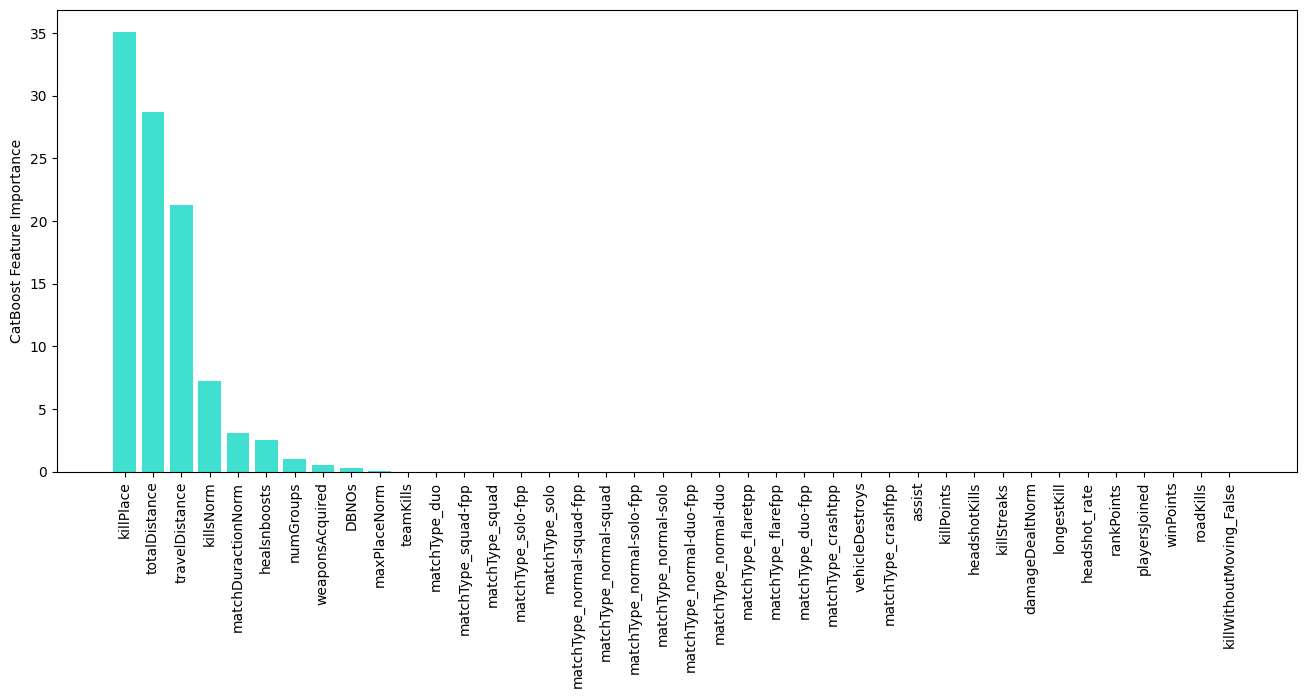

In [55]:
plt.bar(feature_importance_df.features,feature_importance_df.importance,color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()

### Prediction

In [56]:
y_pred = model.predict(x_test)

In [57]:
y_test[:10]

770097     0.3535
2847308    0.3542
2707138    0.3673
771417     0.4444
3655164    0.2692
452685     0.8571
3169952    0.4231
554497     0.1724
126186     0.9167
2133703    0.1111
Name: winPlacePerc, dtype: float64

In [58]:
y_pred[:10]

array([0.33137672, 0.32374591, 0.42857766, 0.34820671, 0.25588046,
       0.77080338, 0.49602192, 0.23745246, 0.80331065, 0.16849395])

In [59]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
# How much is the relevance of model
# Should be higher range from 0 to 1
r2   = r2_score(y_test,y_pred) 
print("Testing Performace")
print("RMSE:{:.2f}".format(rmse))
print("R2:{:.2f}".format(r2))

Testing Performace
RMSE:0.11
R2:0.86


<center><img src = "https://media.giphy.com/media/KB89dMAtH79VIvxNCW/giphy.gif"></center>